# Importing Modules and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = "ticks", color_codes=True)

In [2]:
ad = pd.read_csv('dataset.csv')
print(ad.shape)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(958524, 45)


In [3]:
ad.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


# Exploratory Data Analysis / EDA

In [4]:
def extract_neo(df):
    neo = df.loc[df.neo == 'Y',:]
    neo.to_csv('neo.csv')
    return neo

In [5]:
def extract_pha(df):
    pha = df.loc[df.pha == 'Y',:]
    pha.to_csv('pha.csv')
    return pha

In [6]:
def extract_neo_pha(df):
    neo_pha = df.loc[df.pha == 'Y' & df.neo == 'Y',:]
    neo_pha.to_csv('neo_pha.csv')
    return neo_pha

In [7]:
def plot_scatter(df, params):
    for i in params:
        g = sns.FacetGrid(df, col = "class", hue = "pha")
        g.map(sns.scatterplot, "moid", i, alpha = .7)
        h = sns.FacetGrid(df, col = "class", hue = "pha")
        h.map(sns.scatterplot, "H", i, alpha = .7)
        g.add_legend()
        h.add_legend()
        plt.show()

In [8]:
neo = extract_neo(ad)
neo.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
432,a0000433,2000433,433 Eros (1898 DQ),433,Eros,NaN,Y,N,10.4,16.840,...,4.087800e-08,2.163900e-07,2.439200e-07,3.784900e-07,1.179600e-10,5.555100e-11,6.918600e-07,6.381100e-08,AMO,0.27423
718,a0000719,2000719,719 Albert (1911 MT),719,Albert,NaN,Y,N,15.4,NaN,...,2.910800e-06,1.657500e-05,1.682700e-05,2.521300e-06,3.914800e-09,3.309000e-10,1.030600e-05,2.252800e-06,AMO,0.39148
886,a0000887,2000887,887 Alinda (1918 DB),887,Alinda,NaN,Y,N,13.8,4.200,...,5.204700e-06,2.722800e-05,2.832100e-05,1.215100e-05,1.077600e-08,1.054100e-09,4.898000e-05,5.913600e-06,AMO,0.50197
1035,a0001036,2001036,1036 Ganymed (1924 TD),1036,Ganymed,NaN,Y,N,9.4,37.675,...,4.053800e-06,7.192300e-06,7.608300e-06,2.395500e-06,3.708300e-09,3.085200e-10,1.055200e-05,2.163400e-06,AMO,0.38253
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,17.7,1.000,...,5.737300e-06,2.693700e-05,2.839900e-05,8.195300e-06,1.558800e-09,3.145500e-10,2.209100e-05,8.244200e-07,AMO,0.46287


In [9]:
pha = extract_pha(ad)
pha.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
1565,a0001566,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.90,1.00,...,0.000013,0.000004,0.000007,0.000006,5.148400e-09,3.451500e-09,0.000008,1.603100e-06,APO,0.33228
1619,a0001620,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.30,2.56,...,0.000003,0.000003,0.000003,0.000003,2.121200e-10,1.355900e-10,0.000004,9.712800e-08,APO,0.40639
1861,a0001862,2001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,16.25,1.50,...,0.000003,0.000024,0.000025,0.000003,1.294700e-09,4.680600e-10,0.000006,5.513800e-07,APO,0.48568
1980,a0001981,2001981,1981 Midas (1973 EA),1981,Midas,NaN,Y,Y,15.20,3.40,...,0.000008,0.000002,0.000005,0.000002,4.577900e-09,9.749200e-10,0.000004,2.025600e-06,APO,0.39337
2100,a0002101,2002101,2101 Adonis (1936 CA),2101,Adonis,NaN,Y,Y,18.80,0.60,...,0.000010,0.000430,0.000430,0.000011,2.478900e-09,4.316600e-10,0.000029,1.054200e-06,APO,0.73830


In [10]:
print(neo.shape)
cols = list(neo.columns)
print(cols)

(22895, 45)
['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms']


In [11]:
neo.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,2.289500e+04,22884.000000,849.000000,802.000000,760.000000,2.289500e+04,22895.000000,2.289500e+04,22895.000000,22895.000000,...,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,22895.000000
mean,4.961196e+06,22.869623,1.168998,0.180098,0.132906,2.458357e+06,58356.383621,2.018272e+07,0.443916,1.782582,...,4.275990e-03,1.563366e-01,2.307824e-01,6.378381e-01,1.126429e+00,5.845519e-02,7.390881e-03,1.970858e+00,6.690836e+01,0.599343
std,8.557436e+06,2.984606,1.918393,0.139816,0.261699,1.437415e+03,1437.415398,3.964207e+04,0.176964,2.426534,...,1.003328e-01,4.000889e+00,5.854722e+00,1.142163e+01,2.177551e+01,1.631185e+00,1.621667e-01,5.276196e+01,5.798040e+03,17.752762
min,2.000433e+06,9.400000,0.002500,0.009000,0.000500,2.444222e+06,44221.000000,1.979121e+07,0.002846,0.555418,...,2.616800e-10,4.087800e-08,2.163900e-07,2.439200e-07,2.103800e-07,4.846400e-11,2.860900e-11,3.088400e-07,2.335200e-08,0.037189
25%,3.397572e+06,20.600000,0.351000,0.057250,0.013000,2.458752e+06,58752.000000,2.019093e+07,0.313677,1.310277,...,5.399150e-07,3.627075e-05,5.417475e-05,1.151825e-04,1.852925e-04,1.955750e-07,5.070625e-08,2.849250e-04,9.735950e-05,0.396545
50%,3.690053e+06,23.100000,0.700000,0.153500,0.038000,2.459000e+06,59000.000000,2.020053e+07,0.457464,1.713459,...,2.260500e-05,1.760500e-03,5.113850e-04,1.676300e-03,5.144550e-02,3.874950e-04,1.452150e-04,2.431700e-02,1.924850e-01,0.472730
75%,3.789664e+06,25.183500,1.400000,0.268750,0.148000,2.459000e+06,59000.000000,2.020053e+07,0.569426,2.194203,...,1.818450e-04,1.423375e-02,3.848025e-03,1.289375e-02,2.697075e-01,3.972650e-03,1.056125e-03,3.016675e-01,1.964025e+00,0.555490
max,5.401723e+07,33.200000,37.675000,0.856000,3.496000,2.459000e+06,59000.000000,2.020053e+07,0.996476,352.628376,...,8.188100e+00,3.845900e+02,5.681800e+02,7.960800e+02,2.013800e+03,1.690400e+02,1.672300e+01,4.949200e+03,8.711000e+05,2686.600000


In [12]:
new_ad = ad[ad['pha'].notna()]
new_ad = new_ad[new_ad['neo'].notna()]

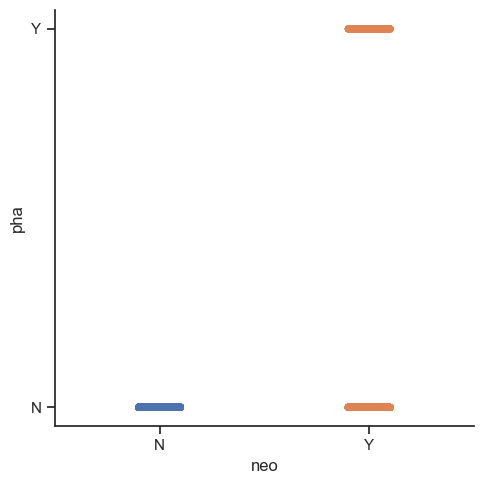

In [13]:
sns.catplot(x = "neo", y = "pha", data = new_ad)
plt.show()

In [14]:
param_imp = ['diameter', 'albedo', 'e', 'a', 'q', 'i', 'tp']

In [15]:
neo[param_imp].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 432 to 958521
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  849 non-null    float64
 1   albedo    802 non-null    float64
 2   e         22895 non-null  float64
 3   a         22895 non-null  float64
 4   q         22895 non-null  float64
 5   i         22895 non-null  float64
 6   tp        22895 non-null  float64
dtypes: float64(7)
memory usage: 1.4 MB


In [16]:
neo[param_imp].describe()

,diameter,albedo,e,a,q,i,tp
count,849.000000,802.000000,22895.000000,22895.000000,22895.000000,22895.000000,2.289500e+04
mean,1.168998,0.180098,0.443916,1.782582,0.913972,12.519644,2.458346e+06
std,1.918393,0.139816,0.176964,2.426534,0.232710,11.125158,1.457585e+03
min,0.002500,0.009000,0.002846,0.555418,0.070511,0.013518,2.444268e+06
25%,0.351000,0.057250,0.313677,1.310277,0.783904,4.580640,2.458453e+06
50%,0.700000,0.153500,0.457464,1.713459,0.963881,8.843493,2.458868e+06
75%,1.400000,0.268750,0.569426,2.194203,1.068407,17.741780,2.459087e+06
max,37.675000,0.856000,0.996476,352.628376,1.299988,165.541000,2.460373e+06


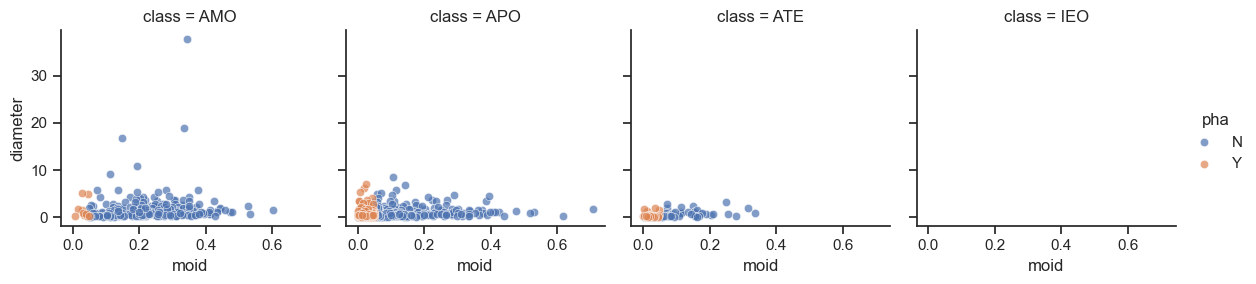

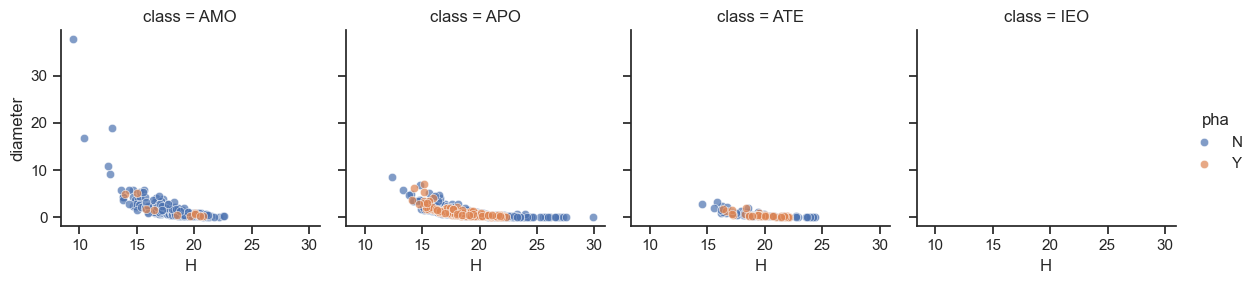

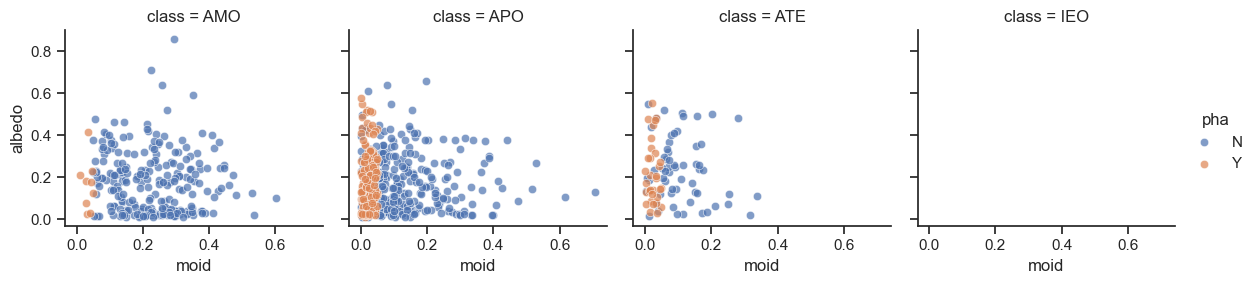

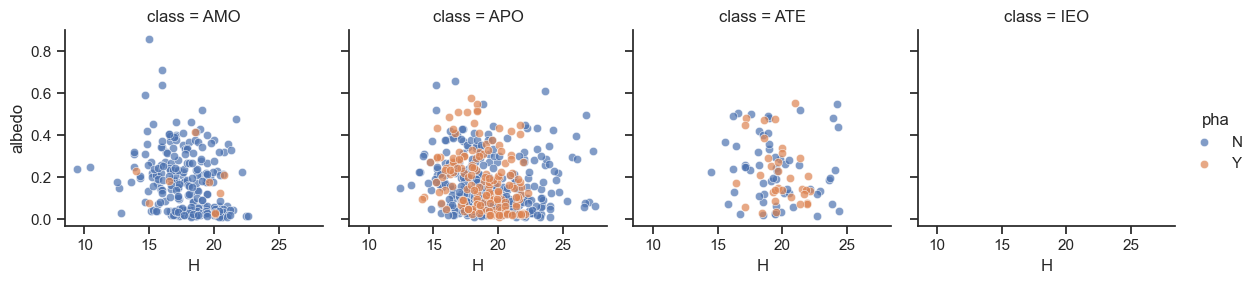

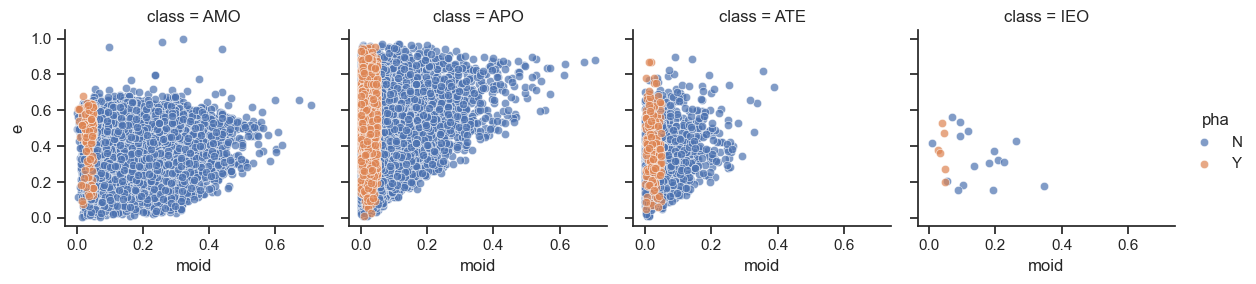

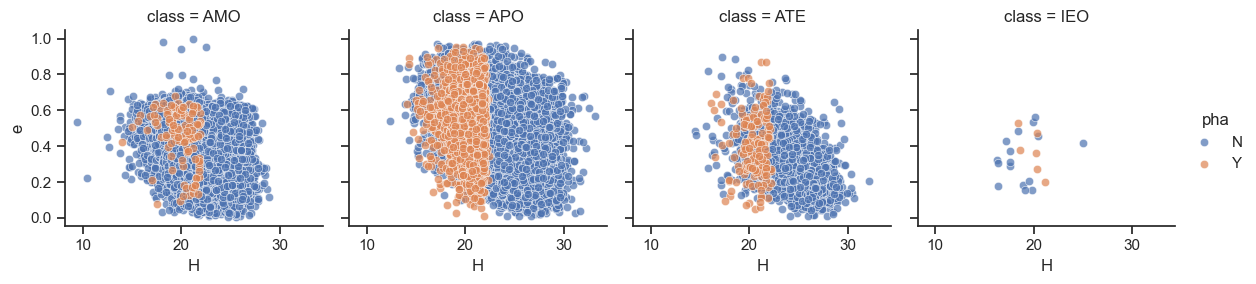

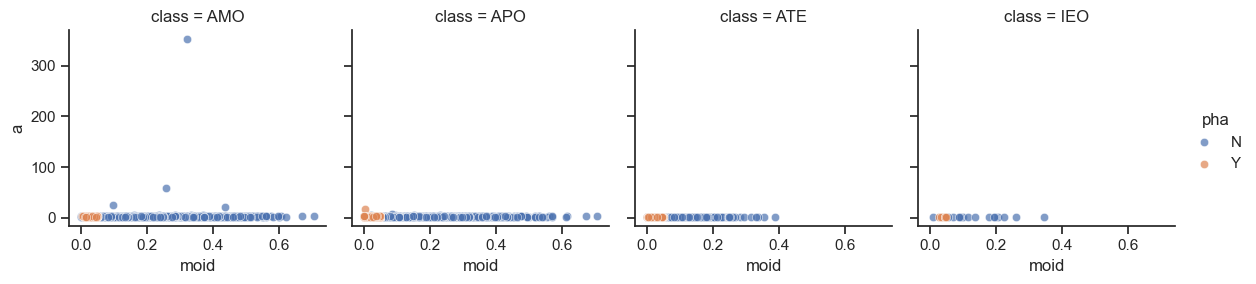

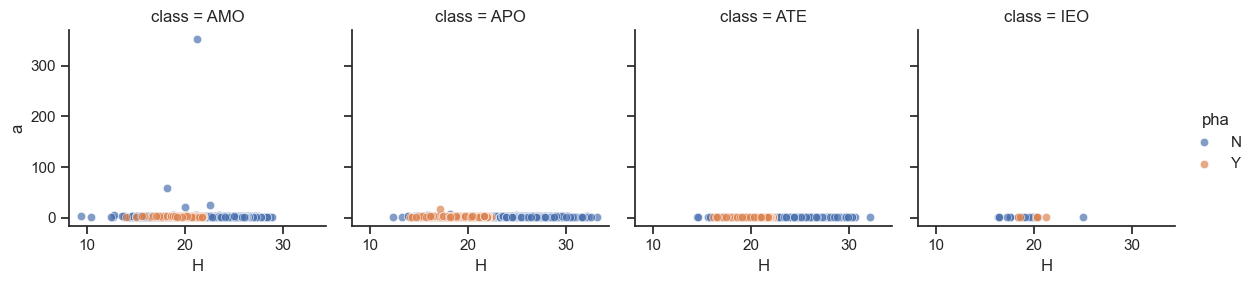

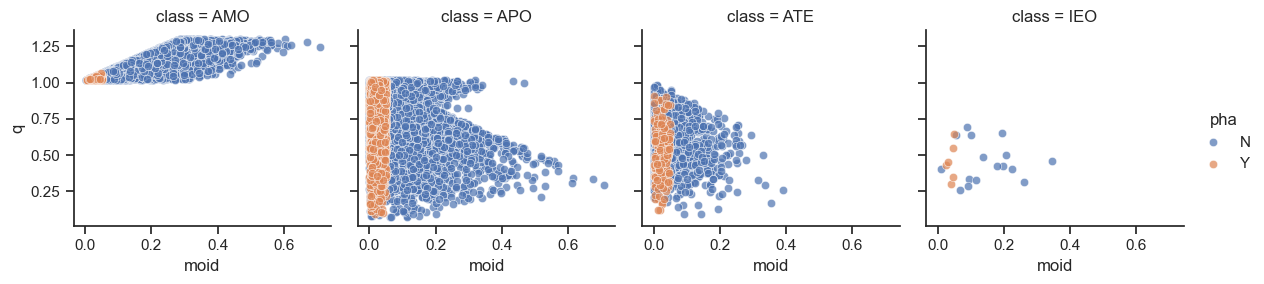

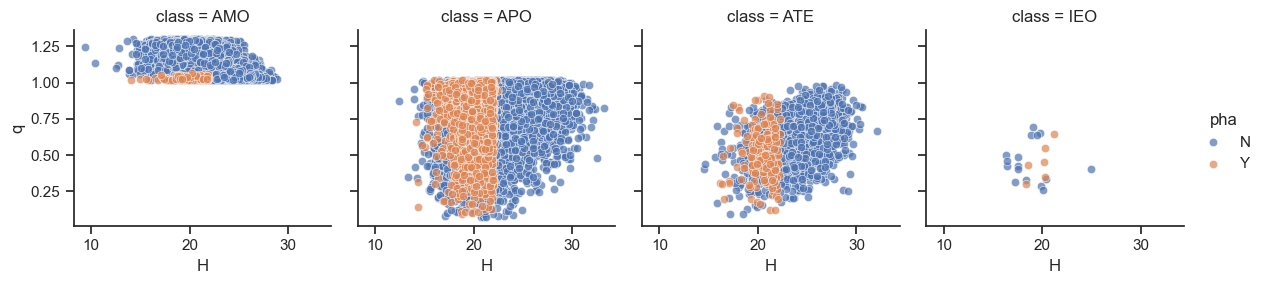

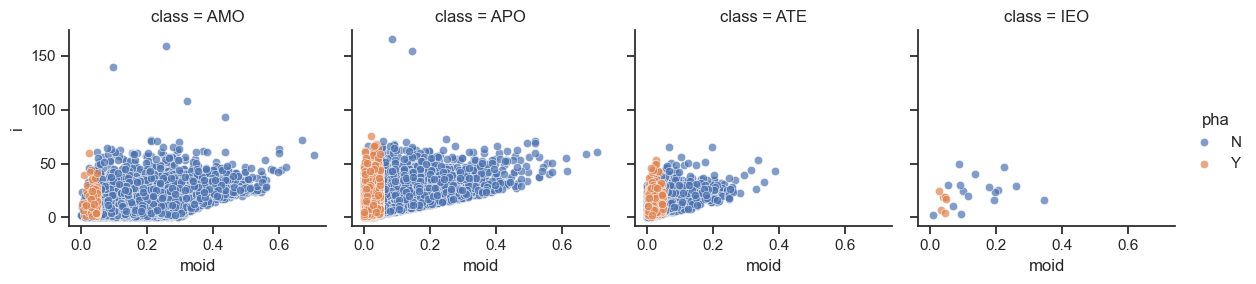

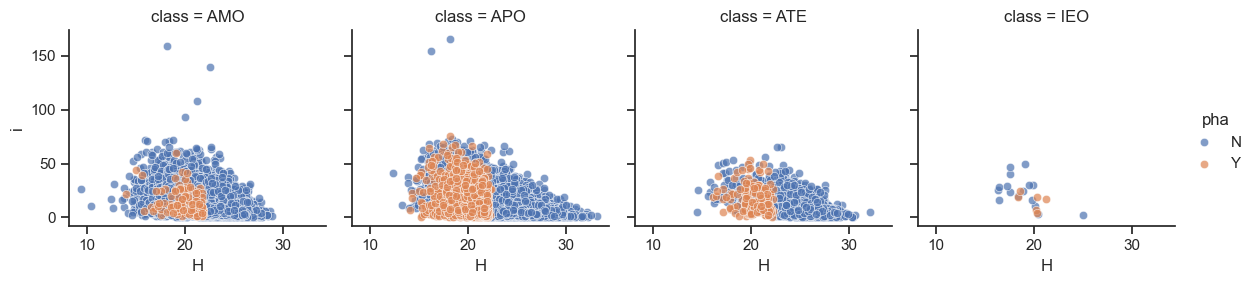

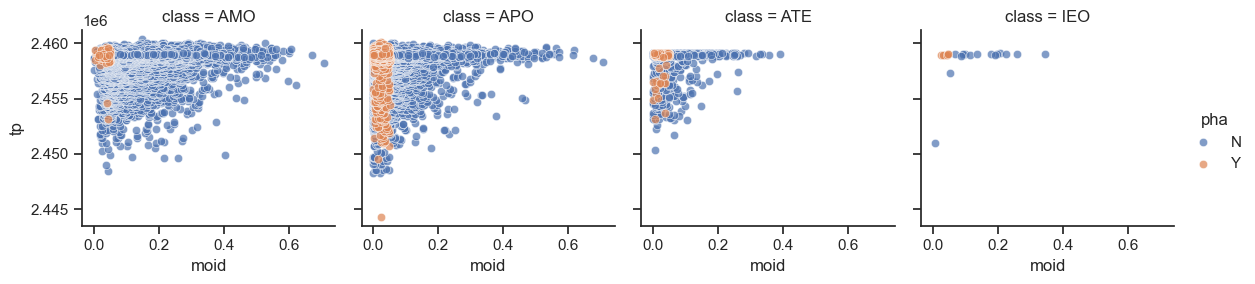

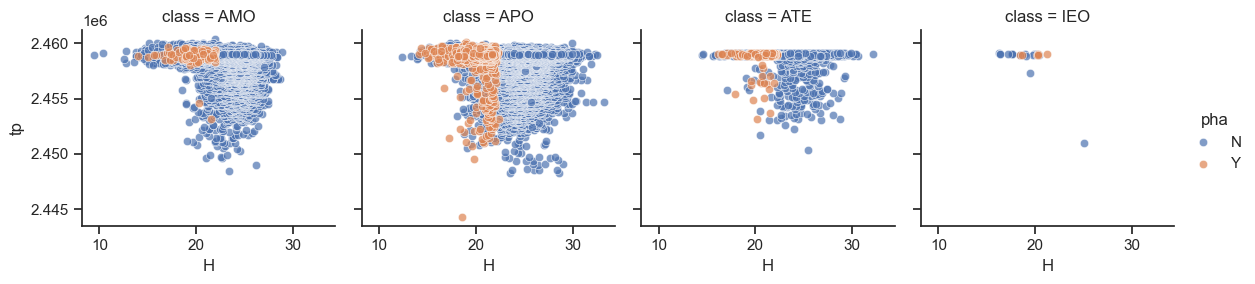

In [17]:
plot_scatter(neo, param_imp)

In [18]:
param_oth = ['om', 'w', 'ma', 'ad', 'n', 'rms']

In [19]:
neo[param_oth].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 432 to 958521
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      22895 non-null  float64
 1   w       22895 non-null  float64
 2   ma      22895 non-null  float64
 3   ad      22895 non-null  float64
 4   n       22895 non-null  float64
 5   rms     22895 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


In [20]:
neo[param_oth].describe()

,om,w,ma,ad,n,rms
count,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000
mean,172.560956,181.982241,171.727375,2.651191,0.518787,0.599343
std,103.490498,104.201613,121.187638,4.836224,0.280655,17.752762
min,0.025992,0.007924,0.005210,0.653773,0.000149,0.037189
25%,82.401768,92.478178,52.424668,1.707376,0.303242,0.396545
50%,172.457893,184.088932,163.400370,2.478915,0.439434,0.472730
75%,253.722575,271.584225,290.269795,3.394601,0.657142,0.555490
max,359.977940,359.982032,359.998040,704.014132,2.381082,2686.600000


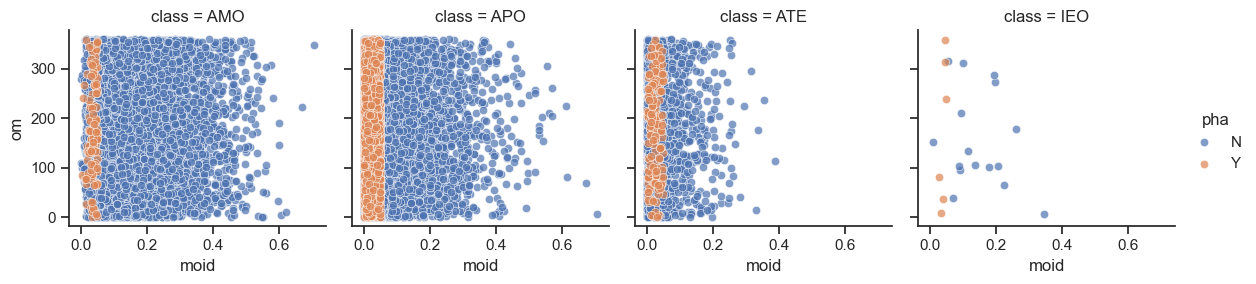

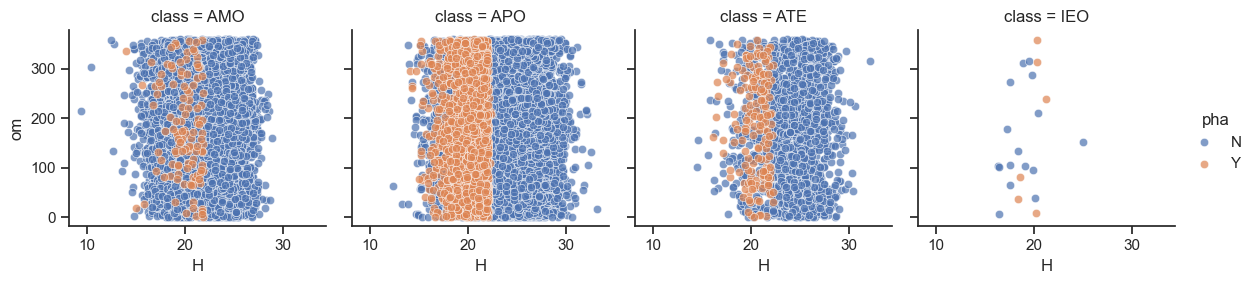

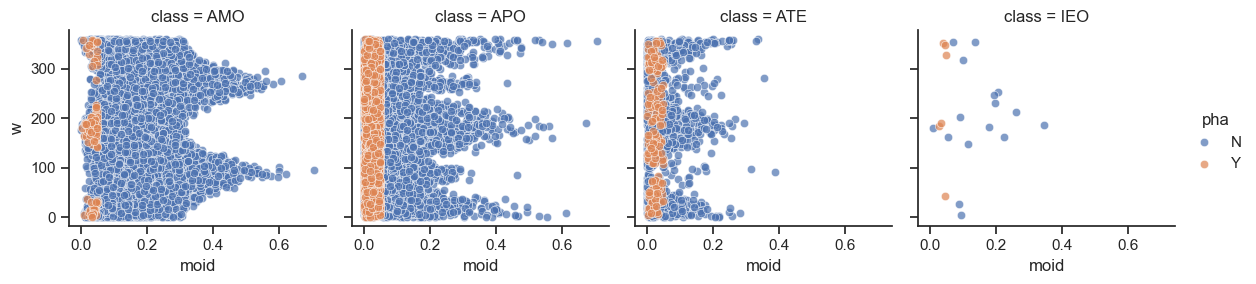

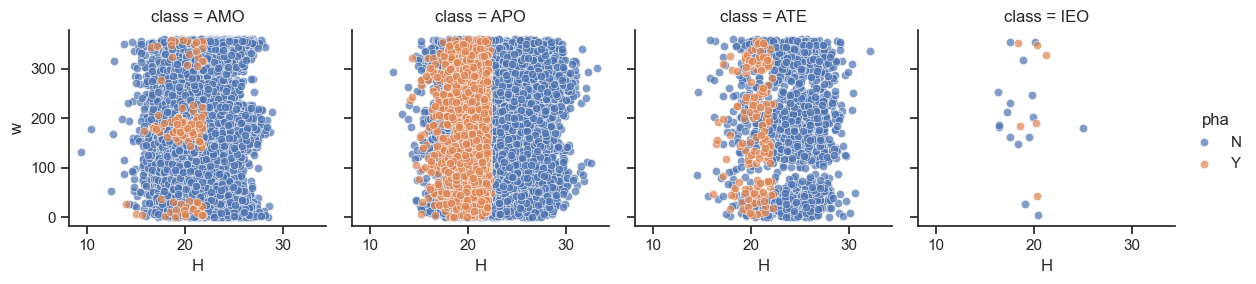

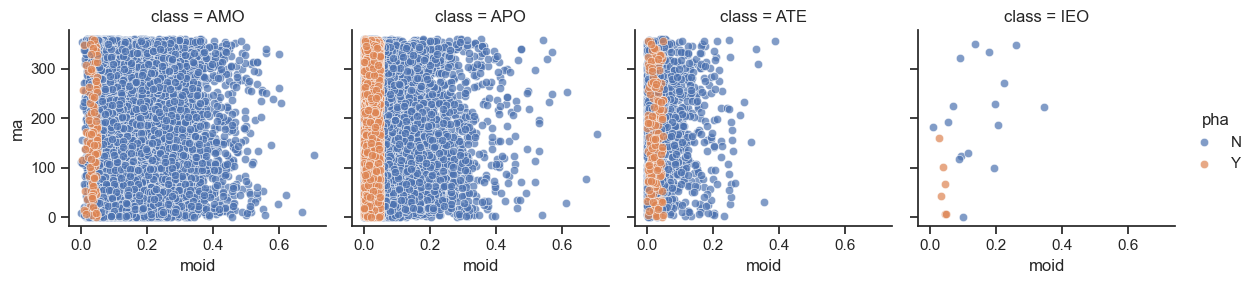

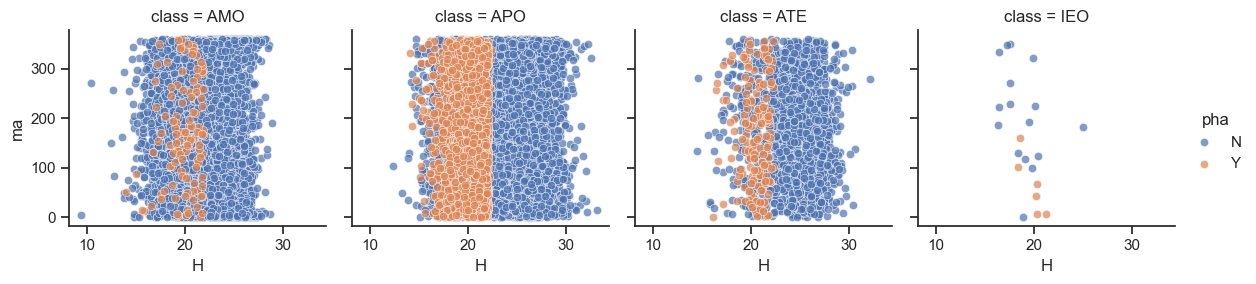

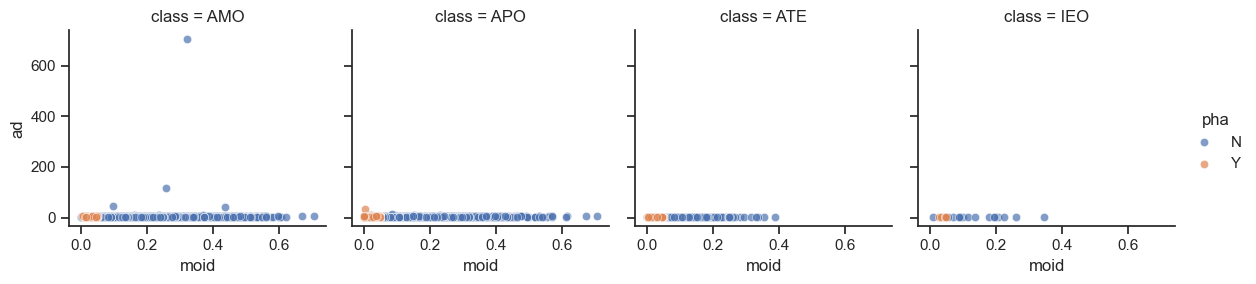

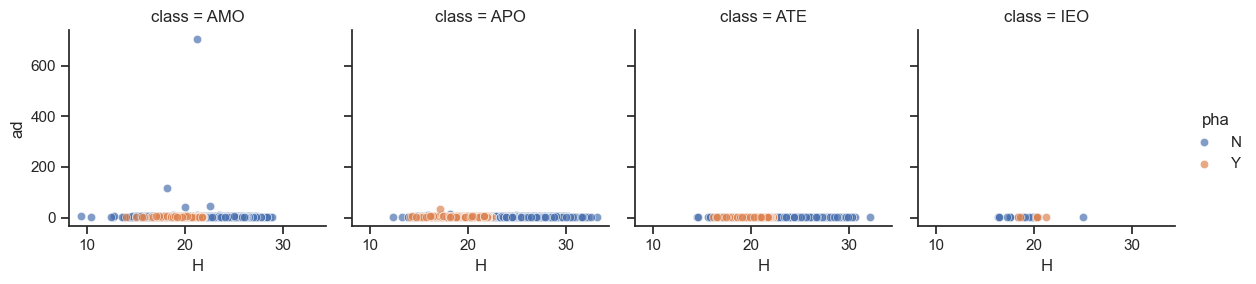

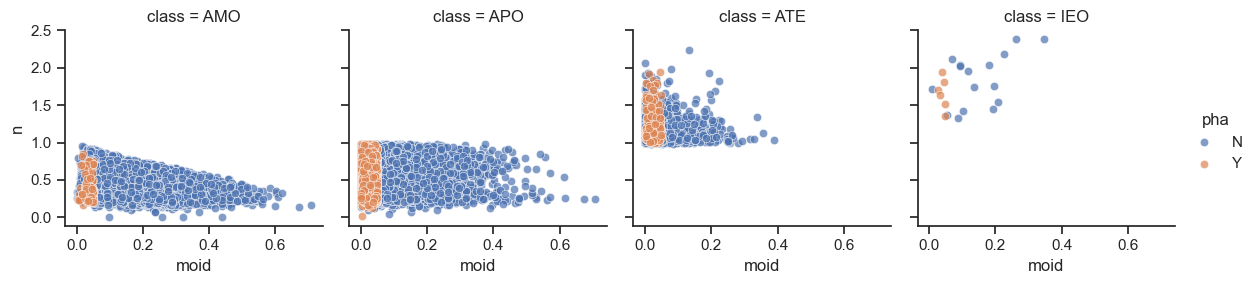

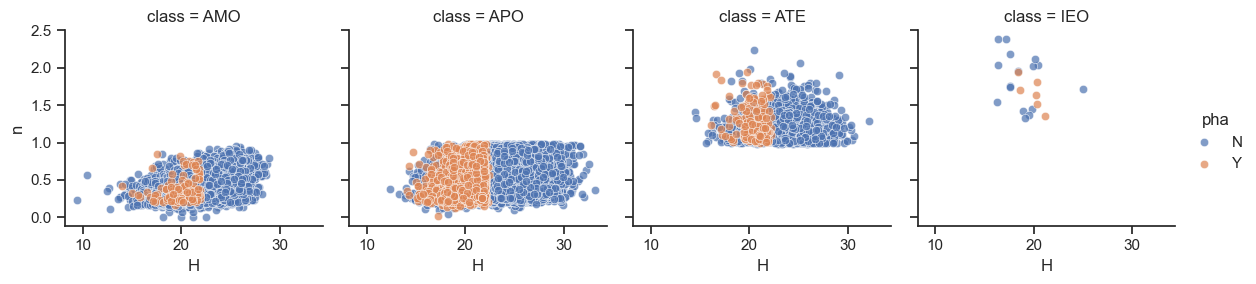

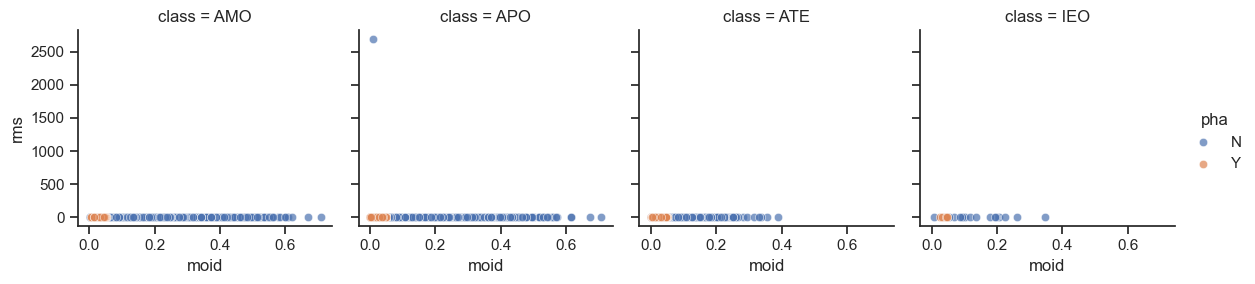

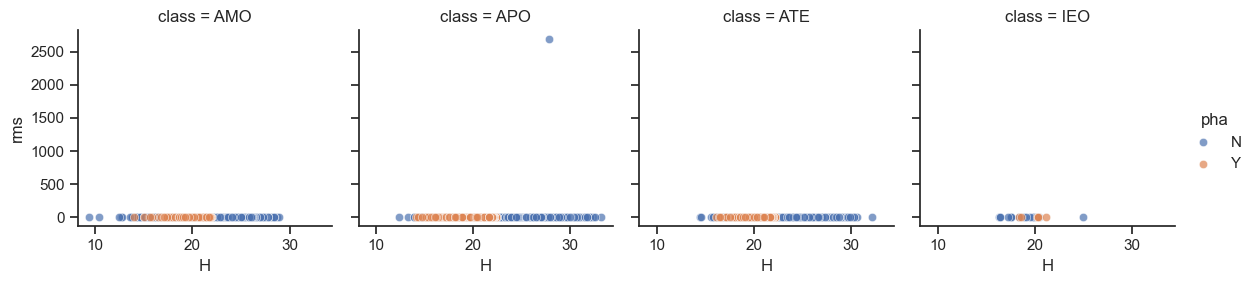

In [21]:
plot_scatter(neo, param_oth)

In [22]:
! pip3 install pyforest

In [23]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
def convert_to_bin(df, column):
    df[column] = df[column].map({'Y': int(1), 'N': int(0), 'NaN': int(0)})
    return df

In [26]:
neo_new = convert_to_bin(neo, 'pha')
neo_final = convert_to_bin(neo_new, 'neo')

In [27]:
params_imp = ['neo']  + ['pha'] + param_imp
params_all = params_imp + param_oth

In [28]:
neo_params_imp = neo_final[params_imp]
neo_params_imp

,neo,pha,diameter,albedo,e,a,q,i,tp
432,1,0.0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2.459159e+06
718,1,0.0,NaN,NaN,0.546558,2.638602,1.196452,11.567485,2.458390e+06
886,1,0.0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2.459259e+06
1035,1,0.0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2.458979e+06
1220,1,0.0,1.000,NaN,0.435285,1.919498,1.083970,11.876537,2.458897e+06
...,...,...,...,...,...,...,...,...,...
958510,1,0.0,NaN,NaN,0.223160,1.271914,0.988073,6.094056,2.459027e+06
958511,1,0.0,NaN,NaN,0.292102,1.059285,0.749866,34.546369,2.458910e+06
958512,1,0.0,NaN,NaN,0.567768,2.175390,0.940274,3.579334,2.459028e+06
958513,1,0.0,NaN,NaN,0.133246,1.065046,0.923133,4.922687,2.458925e+06


In [29]:
neo_params_all = neo_final[params_all]
neo_params_all

,neo,pha,diameter,albedo,e,a,q,i,tp,om,w,ma,ad,n,rms
432,1,0.0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2.459159e+06,304.299327,178.882294,271.071732,1.783119,0.559819,0.27423
718,1,0.0,NaN,NaN,0.546558,2.638602,1.196452,11.567485,2.458390e+06,183.866950,156.176338,140.273422,4.080752,0.229955,0.39148
886,1,0.0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2.459259e+06,110.434218,350.495585,294.579157,3.884588,0.253323,0.50197
1035,1,0.0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2.458979e+06,215.546826,132.364631,4.817745,4.085146,0.226582,0.38253
1220,1,0.0,1.000,NaN,0.435285,1.919498,1.083970,11.876537,2.458897e+06,171.326998,26.694797,38.522409,2.755027,0.370615,0.46287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958510,1,0.0,NaN,NaN,0.223160,1.271914,0.988073,6.094056,2.459027e+06,64.571204,214.529904,341.603063,1.555754,0.687096,0.42725
958511,1,0.0,NaN,NaN,0.292102,1.059285,0.749866,34.546369,2.458910e+06,247.860565,249.476426,76.239413,1.368704,0.904034,0.25400
958512,1,0.0,NaN,NaN,0.567768,2.175390,0.940274,3.579334,2.459028e+06,65.150716,220.493639,348.725881,3.410506,0.307184,0.61686
958513,1,0.0,NaN,NaN,0.133246,1.065046,0.923133,4.922687,2.458925e+06,60.470005,106.428094,67.343617,1.206958,0.896709,0.45051


In [30]:
neo_params_imp.isnull().sum()

neo             0
pha             1
diameter    22046
albedo      22093
e               0
a               0
q               0
i               0
tp              0
dtype: int64

In [31]:
def fill_nan(df):
    for column in df.columns:
        if column == 'pha' or column == 'neo':
            df[column].fillna(value = int(0), inplace=True)
        else:
            df[column].fillna(int(df[column].mean()), inplace=True)
    return df

In [32]:
neo_params_imp = fill_nan(neo_params_imp)
neo_params_all = fill_nan(neo_params_all)

In [33]:
neo_params_all

,neo,pha,diameter,albedo,e,a,q,i,tp,om,w,ma,ad,n,rms
432,1,0.0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2.459159e+06,304.299327,178.882294,271.071732,1.783119,0.559819,0.27423
718,1,0.0,1.000,0.000,0.546558,2.638602,1.196452,11.567485,2.458390e+06,183.866950,156.176338,140.273422,4.080752,0.229955,0.39148
886,1,0.0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2.459259e+06,110.434218,350.495585,294.579157,3.884588,0.253323,0.50197
1035,1,0.0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2.458979e+06,215.546826,132.364631,4.817745,4.085146,0.226582,0.38253
1220,1,0.0,1.000,0.000,0.435285,1.919498,1.083970,11.876537,2.458897e+06,171.326998,26.694797,38.522409,2.755027,0.370615,0.46287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958510,1,0.0,1.000,0.000,0.223160,1.271914,0.988073,6.094056,2.459027e+06,64.571204,214.529904,341.603063,1.555754,0.687096,0.42725
958511,1,0.0,1.000,0.000,0.292102,1.059285,0.749866,34.546369,2.458910e+06,247.860565,249.476426,76.239413,1.368704,0.904034,0.25400
958512,1,0.0,1.000,0.000,0.567768,2.175390,0.940274,3.579334,2.459028e+06,65.150716,220.493639,348.725881,3.410506,0.307184,0.61686
958513,1,0.0,1.000,0.000,0.133246,1.065046,0.923133,4.922687,2.458925e+06,60.470005,106.428094,67.343617,1.206958,0.896709,0.45051


In [34]:
neo_params_imp

,neo,pha,diameter,albedo,e,a,q,i,tp
432,1,0.0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2.459159e+06
718,1,0.0,1.000,0.000,0.546558,2.638602,1.196452,11.567485,2.458390e+06
886,1,0.0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2.459259e+06
1035,1,0.0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2.458979e+06
1220,1,0.0,1.000,0.000,0.435285,1.919498,1.083970,11.876537,2.458897e+06
...,...,...,...,...,...,...,...,...,...
958510,1,0.0,1.000,0.000,0.223160,1.271914,0.988073,6.094056,2.459027e+06
958511,1,0.0,1.000,0.000,0.292102,1.059285,0.749866,34.546369,2.458910e+06
958512,1,0.0,1.000,0.000,0.567768,2.175390,0.940274,3.579334,2.459028e+06
958513,1,0.0,1.000,0.000,0.133246,1.065046,0.923133,4.922687,2.458925e+06


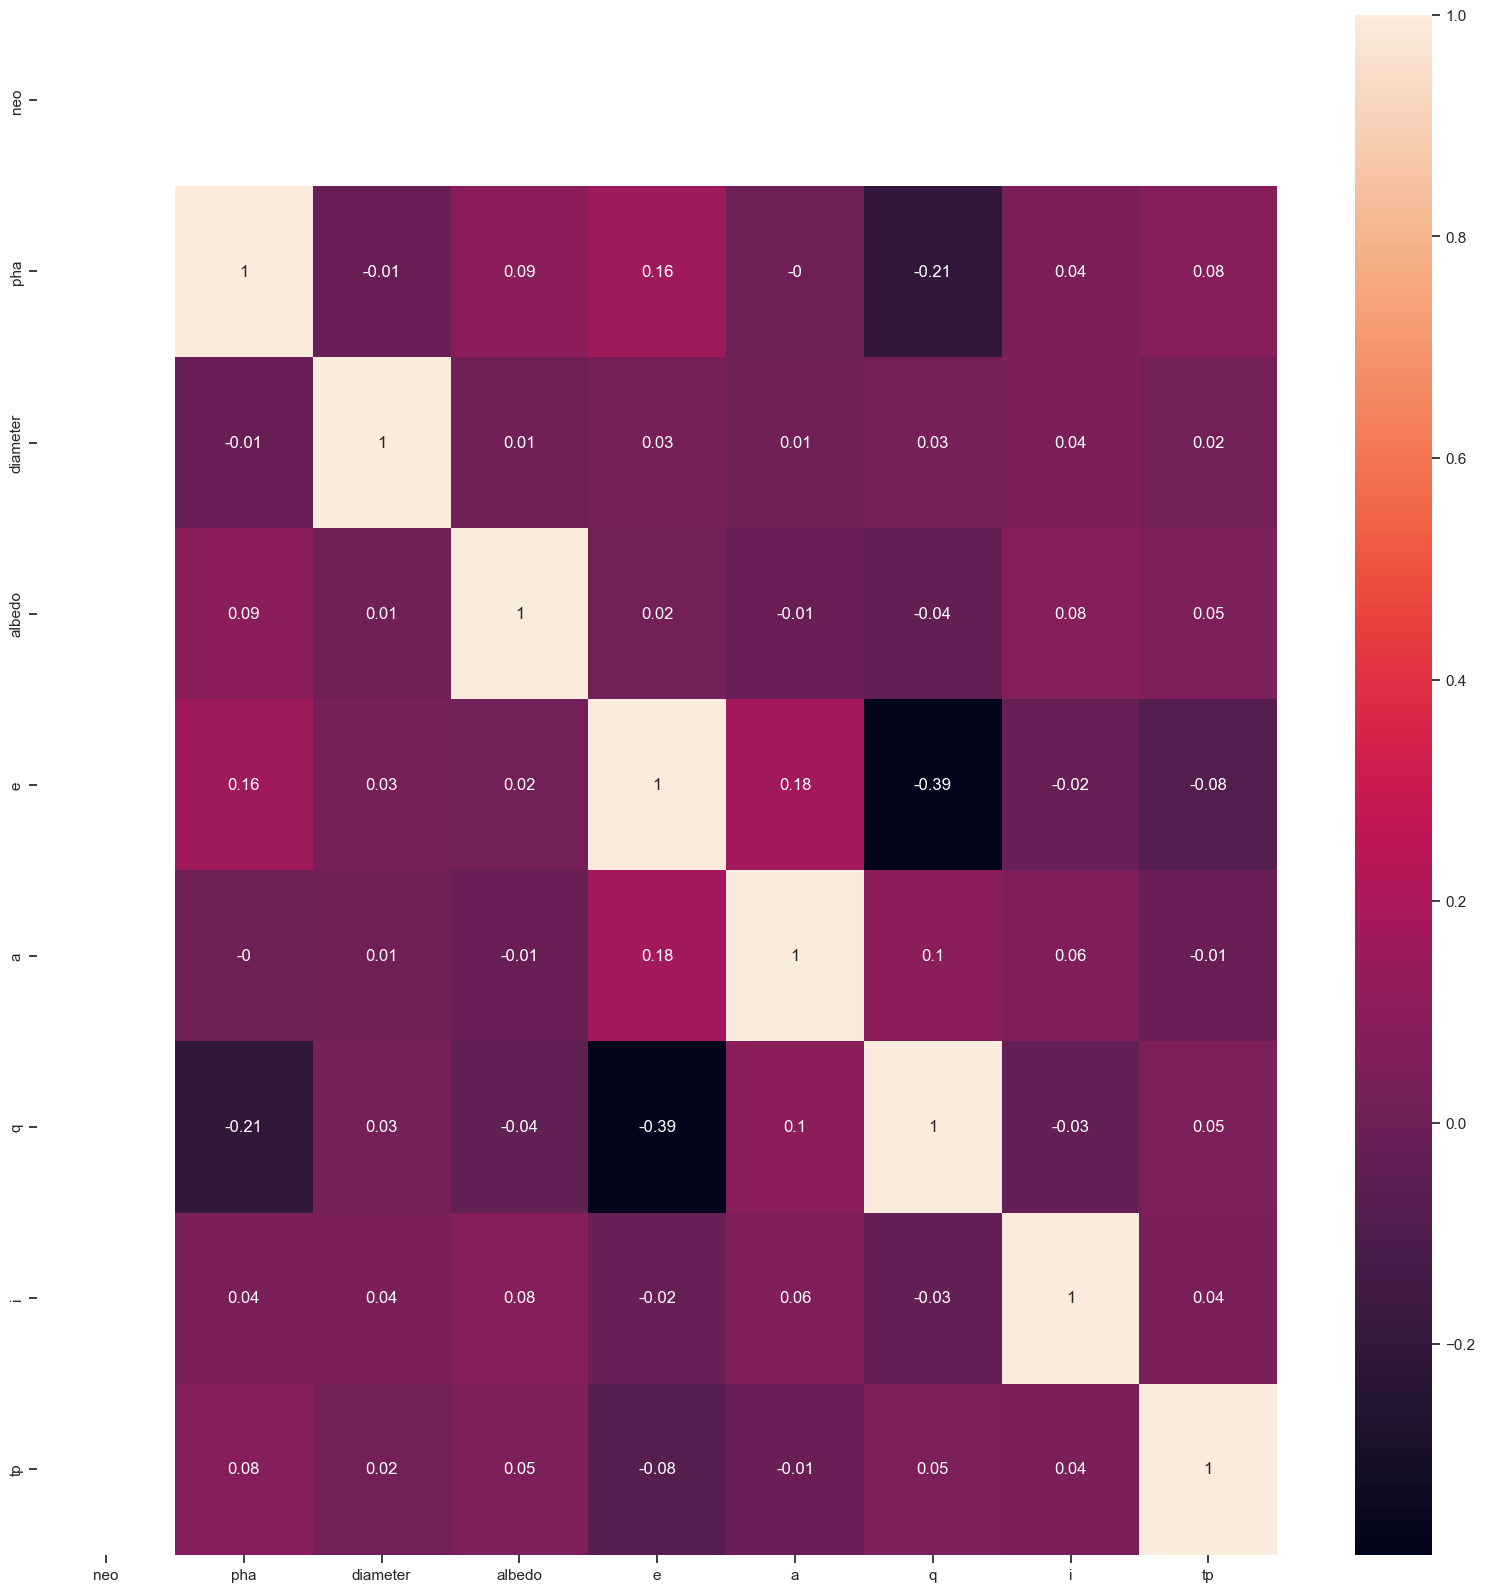

In [35]:
plt.figure(figsize = (20,20))
sns.heatmap(data = round(neo_params_imp.corr(), 2), annot = True)
plt.show()

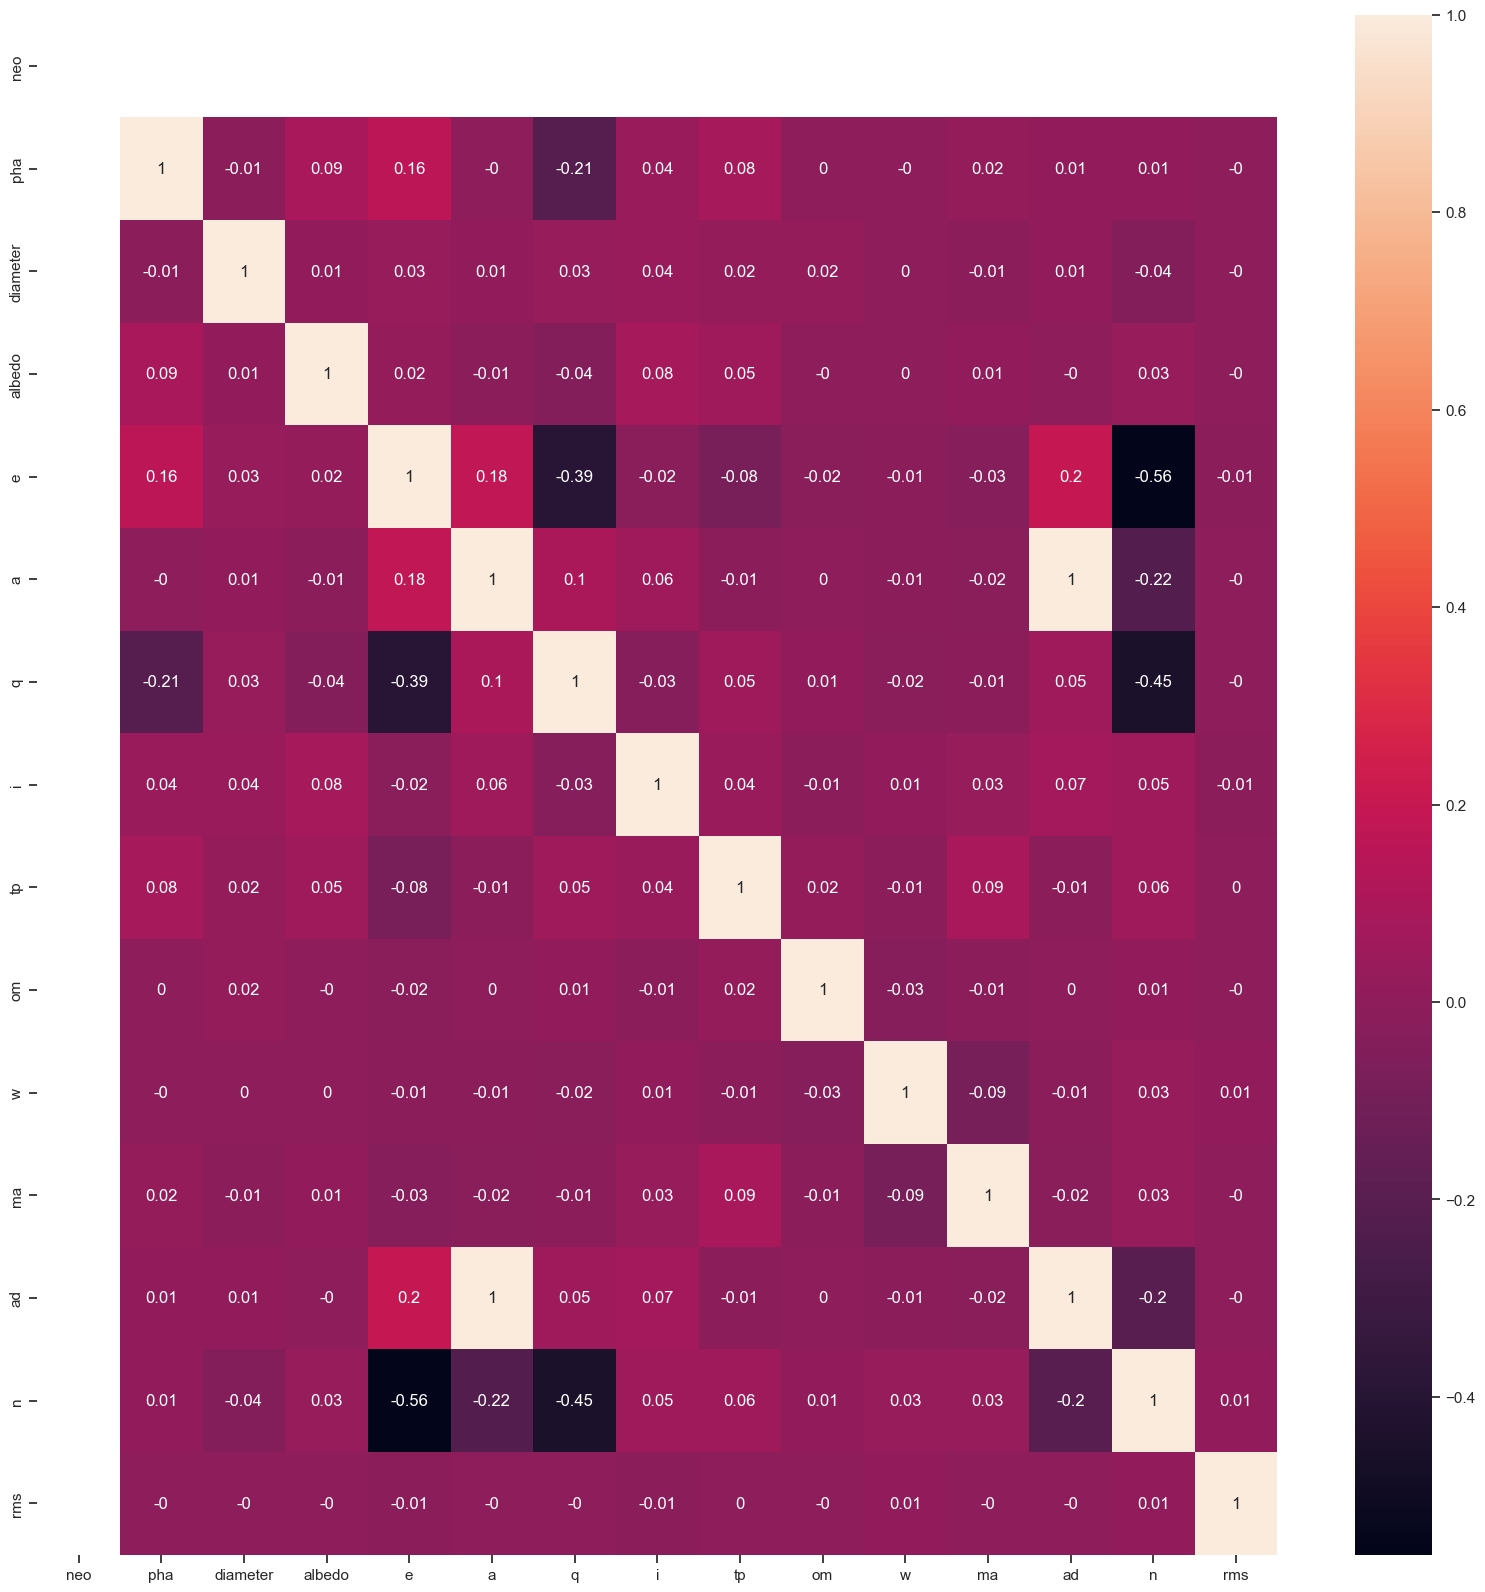

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(data = round(neo_params_all.corr(), 2), annot = True)
plt.show()

# Model Selection and Analysis

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [39]:
def model_fit_score(models, df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    model_scores = pd.DataFrame(model_scores, index = ['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    return model_scores

In [40]:
models = {'LogisticRegression': LogisticRegression(max_iter = 10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()}

In [41]:
model_scores_params_imp = model_fit_score(models, neo_params_imp)
model_scores_params_imp.sort_values('Score', ascending = False)

,Score
RandomForestClassifier,0.914173
SVC,0.913955
GradientBoostingClassifier,0.913737
LogisticRegression,0.911990
AdaBoostClassifier,0.910898
KNeighborsClassifier,0.902817
DecisionTreeClassifier,0.865036


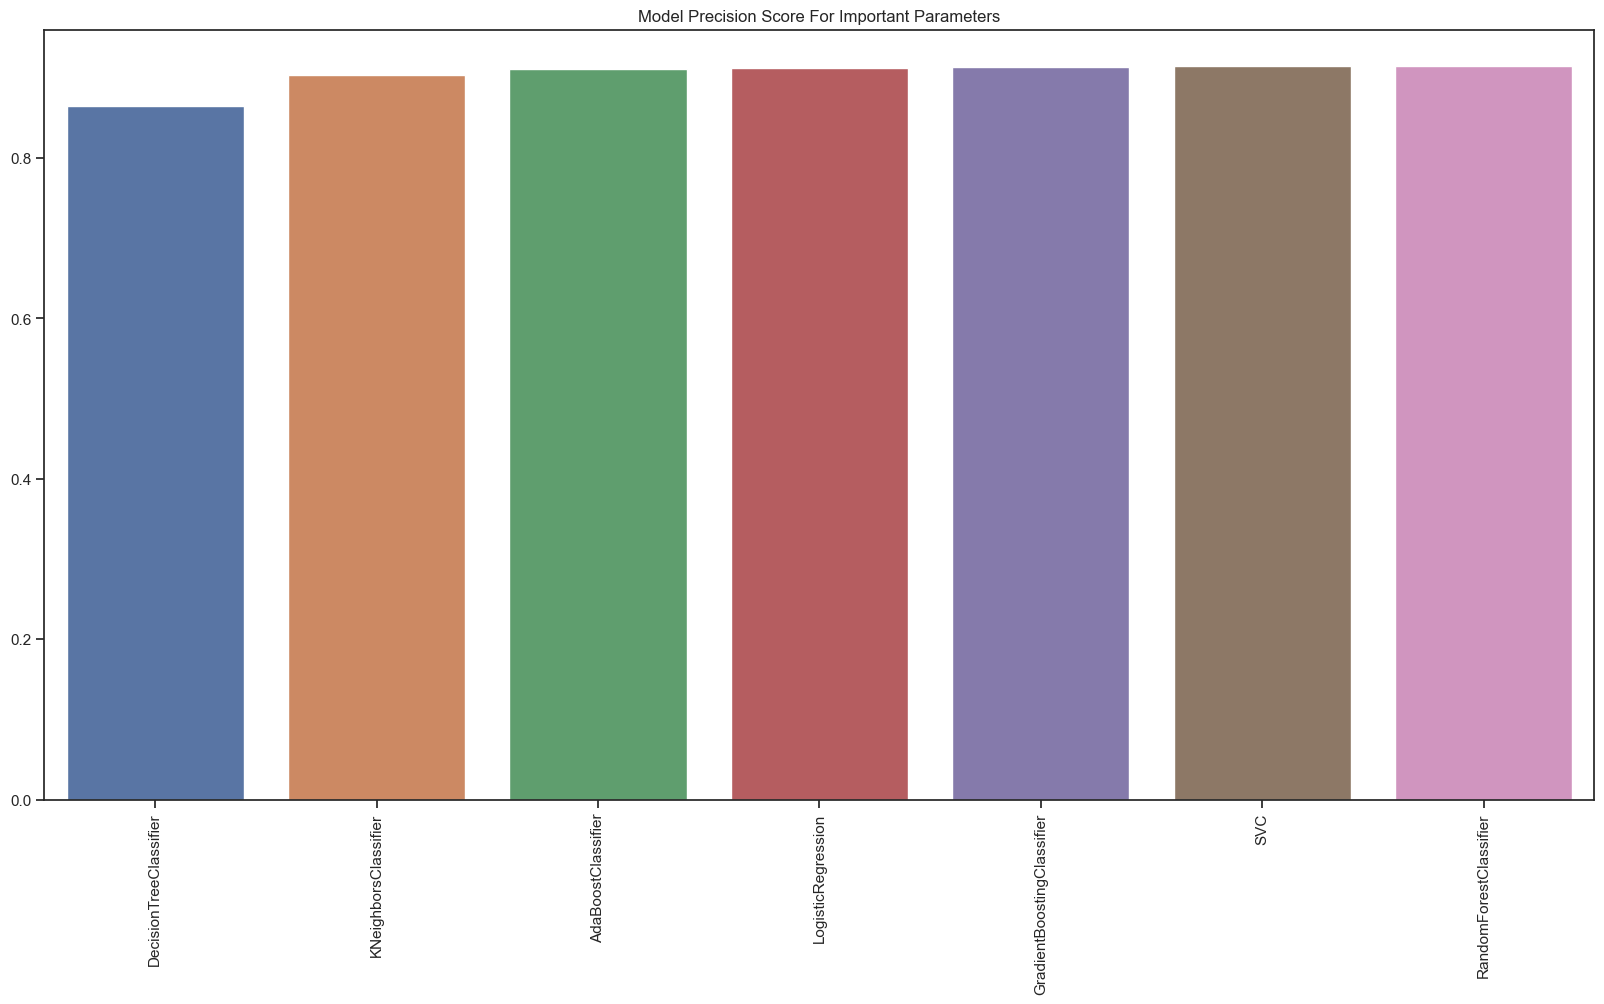

In [42]:
plt.figure(figsize = (20,10))
sns.barplot(data = model_scores_params_imp.sort_values('Score').T)
plt.title('Model Precision Score For Important Parameters')
plt.xticks(rotation = 90);
plt.show()

In [43]:
model_scores_params_all = model_fit_score(models, neo_params_all)
model_scores_params_all.sort_values('Score', ascending = False)

,Score
RandomForestClassifier,0.915921
GradientBoostingClassifier,0.913737
SVC,0.913300
LogisticRegression,0.911334
AdaBoostClassifier,0.910898
KNeighborsClassifier,0.904128
DecisionTreeClassifier,0.868749


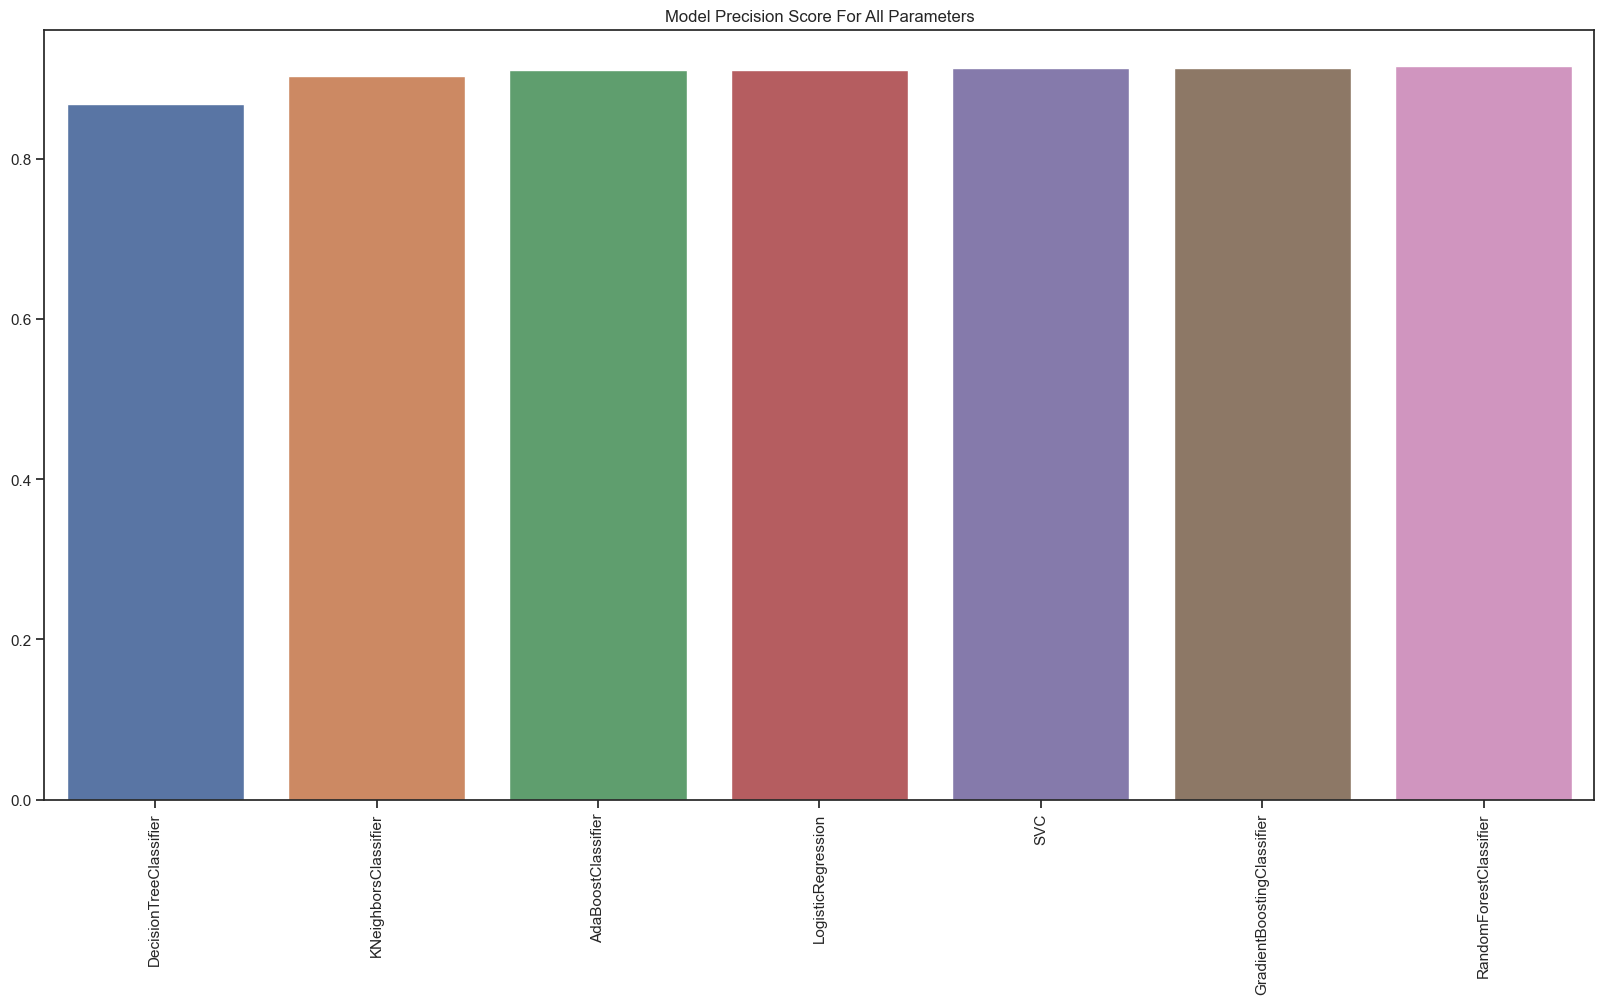

In [44]:
plt.figure(figsize = (20,10))
sns.barplot(data = model_scores_params_all.sort_values('Score').T)
plt.title('Model Precision Score For All Parameters')
plt.xticks(rotation = 90);
plt.show()

## Random Forest Classifier Model

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
def rfc(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    clf = RandomForestClassifier(n_estimators = 10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    result = [acc, cm, cr]
    return result

### Results of RFC for Important Parameters 

In [47]:
result_params_imp = rfc(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

Accuracy: 0.9135182354225814 

Confusion Matrix:
 [[4157   25]
 [ 371   26]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      4182
         1.0       0.51      0.07      0.12       397

    accuracy                           0.91      4579
   macro avg       0.71      0.53      0.54      4579
weighted avg       0.88      0.91      0.88      4579
 



### Results of RFC for All Parameters 

In [ ]:
result_params_all = rfc(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

## Feature Importance Analysis

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def fi_plot(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align = 'center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation = 90)
    plt.tight_layout()
    plt.show()

### Feature importance for Important Parameters 

In [ ]:
fi_plot(neo_params_imp)

### Feature importance for All Parameters 

In [ ]:
fi_plot(neo_params_all)

## Gradient Boosting Classifier Model 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
X = neo_params_all.drop('pha', axis = 1)
y = neo_params_all['pha']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, max_features = 2, max_depth = 2, random_state = 0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

In [ ]:
def gbc(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    classifier = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.5, max_features = 2, max_depth = 2, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    result = [acc, cm, cr]
    return result

### Results of GBC for Important Parameters

In [ ]:
result_params_imp = gbc(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

In [ ]:
result_params_all = gbc(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

## SVC Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
def svc_lin(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    result = [acc, cm, cr]
    return result

In [ ]:
def svc_rbf(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    classifier = SVC(kernel='rbf', random_state = 0, gamma = .01, C = 1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    result = [acc, cm, cr]
    return result

### Results of SVC for Important Parameters

In [ ]:
result_params_imp = svc_lin(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

In [ ]:
result_params_imp = svc_rbf(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

### Results of SVC for All Parameters

In [ ]:
result_params_all = svc_lin(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

In [ ]:
result_params_all = svc_rbf(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

## Logistic Regression Model 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
def logrm(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    acc = logreg.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    result = [acc, cm, cr]
    return result

### Results of LRM for Important Parameters 

In [ ]:
result_params_imp = logrm(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

### Results of LRM for All Parameters 

In [ ]:
result_params_all = logrm(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

# ANN

In [ ]:
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

## Running for Important Parameters 

In [ ]:
def set_up_for_ann(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=25, batch_size=16)
    _, accuracy = model.evaluate(X_test, y_test)
    print()
    print('Accuracy of test: %.2f' % (accuracy*100))

In [ ]:
set_up_for_ann(neo_params_imp)

## Running for All Parameters 

In [ ]:
def set_up_for_ann2(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model = Sequential()
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=25, batch_size=16)
    _, accuracy = model.evaluate(X_test, y_test)
    print()
    print('Accuracy of test: %.2f' % (accuracy*100))

In [ ]:
result_params_all_ann = set_up_for_ann2(neo_params_all)